In [5]:
import pandas as pd

In [54]:
df = pd.read_csv("D:/football_shots_analytics/outputs/detections_bundesliga.csv")

In [55]:
df.head(10)

,frame,class,x1,y1,x2,y2,confidence
0,0,person,tensor(533.7254),tensor(686.3998),tensor(579.3201),tensor(784.5262),tensor(0.8626)
1,0,person,tensor(851.9286),tensor(634.3026),tensor(901.0170),tensor(722.5080),tensor(0.8573)
2,0,person,tensor(994.6577),tensor(454.4098),tensor(1027.5846),tensor(525.7167),tensor(0.8546)
3,0,person,tensor(1369.0548),tensor(814.1021),tensor(1444.1683),tensor(903.6414),tensor(0.8426)
4,0,person,tensor(1570.5789),tensor(610.6716),tensor(1614.1005),tensor(696.1235),tensor(0.8392)
5,0,person,tensor(1309.2797),tensor(445.3984),tensor(1351.7587),tensor(517.6505),tensor(0.8314)
6,0,person,tensor(359.1696),tensor(720.3539),tensor(394.5005),tensor(825.0251),tensor(0.8311)
7,0,person,tensor(872.3297),tensor(362.0067),tensor(905.3227),tensor(422.5176),tensor(0.8062)
8,0,person,tensor(326.4586),tensor(495.4453),tensor(364.1342),tensor(570.0192),tensor(0.7943)
9,0,person,tensor(1276.7467),tensor(393.0129),tensor(1308.4247),tensor(463.8371),tensor(0.7864)


In [56]:
cols = df[['x1', 'y1', 'x2', 'y2', 'confidence']]

In [61]:
for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(r"tensor\(|\)", "", regex=True)
    pd.to_numeric(df[col], errors="coerce")

In [63]:
print(df.head(10))

   frame   class         x1        y1         x2        y2 confidence
0      0  person   533.7254  686.3998   579.3201  784.5262     0.8626
1      0  person   851.9286  634.3026   901.0170  722.5080     0.8573
2      0  person   994.6577  454.4098  1027.5846  525.7167     0.8546
3      0  person  1369.0548  814.1021  1444.1683  903.6414     0.8426
4      0  person  1570.5789  610.6716  1614.1005  696.1235     0.8392
5      0  person  1309.2797  445.3984  1351.7587  517.6505     0.8314
6      0  person   359.1696  720.3539   394.5005  825.0251     0.8311
7      0  person   872.3297  362.0067   905.3227  422.5176     0.8062
8      0  person   326.4586  495.4453   364.1342  570.0192     0.7943
9      0  person  1276.7467  393.0129  1308.4247  463.8371     0.7864


In [65]:
#check number of nan
print(df.isna().sum())

frame         0
class         0
x1            0
y1            0
x2            0
y2            0
confidence    0
dtype: int64


In [66]:
df.to_csv("D:/football_shots_analytics/outputs/detections.csv", index=False)

# Checking player per frame

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("D:/football_shots_analytics/outputs/detections.csv")

In [68]:
detections_per_frame = df.groupby('frame')['class'].count()

In [69]:
person_per_frame = df[df['class'] == 'person'].groupby('frame')['class'].count()

In [70]:
balls_per_frame = df[df['class'] == 'sports ball'].groupby('frame')['class'].count()

In [72]:
print("średnia liczba zawodników na klatke ", statistics.mean(person_per_frame))

średnia liczba zawodników na klatke  21.433333333333334


In [73]:
print("Średnia liczba piłke na klatke ", statistics.mean(balls_per_frame))

Średnia liczba piłke na klatke  1


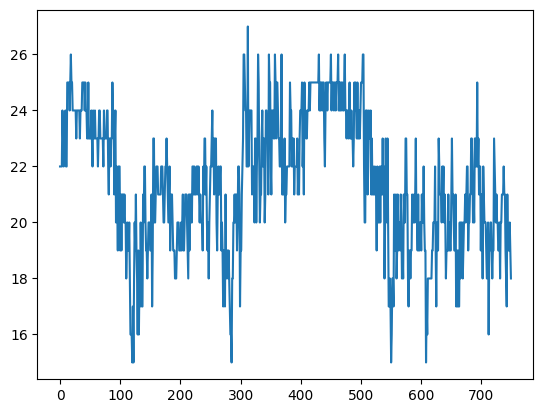

In [75]:
plt.plot(person_per_frame)

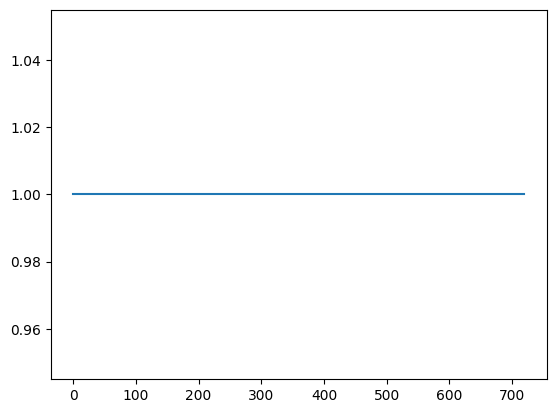

In [76]:
plt.plot(balls_per_frame)

# How YOLO detects

In [7]:
import cv2

In [8]:
video_path = 'D:/football_shots_analytics/data/clips/match_shorts/bundesliga.mp4'

In [9]:
frames_to_show = [0, 30, 60, 90, 120]

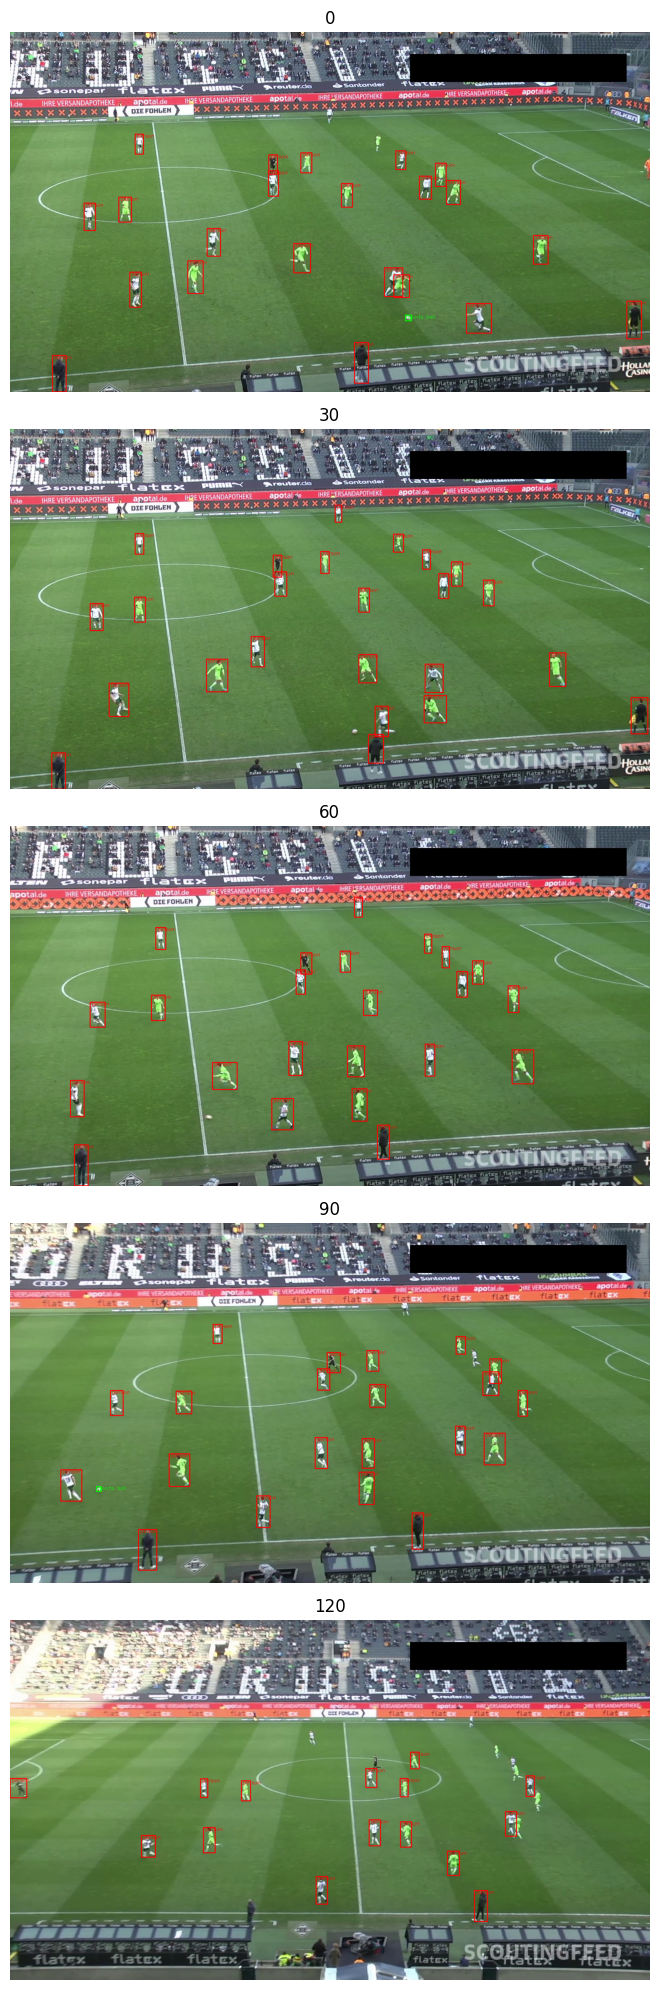

In [34]:
fig, axs = plt.subplots(5, figsize = (30, 20))
axs = axs.flatten()
color_map = {
    'person' : (0, 0, 255),
    'sports ball' : (0, 255, 0)
}
font = cv2.FONT_HERSHEY_SIMPLEX
cap = cv2.VideoCapture(video_path)
for idx, frame_id in enumerate(frames_to_show):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    if ret == False:
        break
    vis = frame.copy()
    rows = df[df['frame'] == frame_id]
    for _, row in rows.iterrows():
        pt1 = int(row['x1']), int(row['y1'])
        pt2 = int(row['x2']), int(row['y2'])
        color = color_map[row['class']]
        img = cv2.rectangle(vis,pt1,pt2, color, 2)
        pt_text = int(row['x1'] + 5), int(row['y1'] + 10)
        img = cv2.putText(vis, row['class'], pt_text, font, 0.5, color)
    axs[idx].imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    axs[idx].set_title(frame_id)
    axs[idx].axis('off')

plt.tight_layout()
plt.show()
cap.release()